
Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


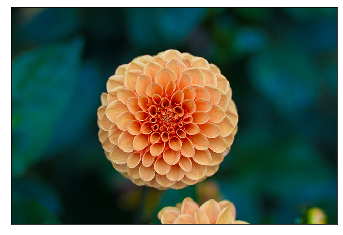

In [1]:
import matplotlib.pyplot as plt

#load flower figure
from sklearn.datasets import load_sample_image
flower=load_sample_image("flower.jpg")
axe = plt.axes(xticks=[], yticks=[])
axe.imshow(flower)

In [2]:
#dimension of the flower pixel array
flower.shape

(427, 640, 3)

In [31]:
# find maximum pixel values of the array
import numpy as np
np.max(flower)

255

In [33]:
#Number of unique pixels
np.unique(flower)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
# rescale array into 0<x<1 and reshaping into RGB sets
df=flower/np.max(flower)
df=df.reshape(df.shape[0]*df.shape[1],df.shape[2])
print(df.shape)

(273280, 3)


In [5]:
#Plotting subplots
def plot_pixel(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
        
    rng=np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, axes = plt.subplots(1,2, sharey=False, squeeze=True, figsize=(12, 6))
    axes[0].scatter(R,G,color=colors)
    axes[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    axes[1].scatter(R,B,color=colors)
    axes[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=24)

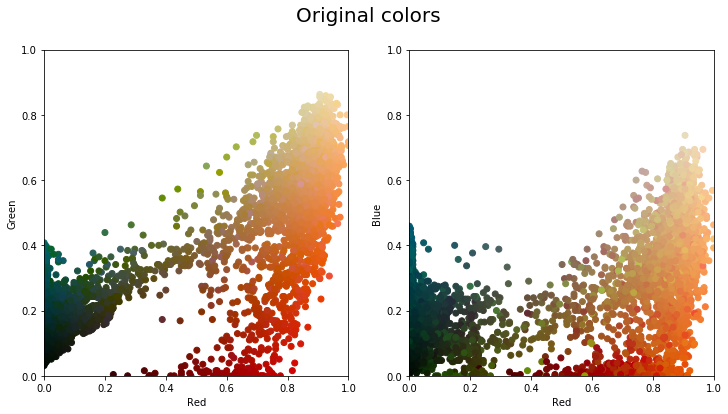

In [6]:
plot_pixel(df,title='Original colors')

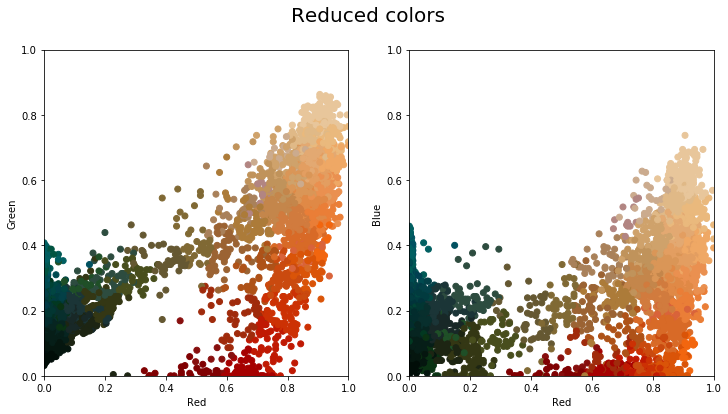

In [23]:
#MiniBatchKMeans runs faster than KMeans

from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=64, init='k-means++', n_init=20, max_iter=500, random_state=40)
Y_kmeans = kmeans.fit_predict(df)
new_colors = kmeans.cluster_centers_[Y_kmeans]

plot_pixel(df,colors=new_colors,title='Reduced colors')

In [28]:
flower_recolored = new_colors.reshape(flower.shape)
print('Max value: ', np.max(flower_recolored)*255, '\nShape: ', flower_recolored.shape)

Max value:  242.0 
Shape:  (427, 640, 3)


In [45]:
#Number of unique pixels
np.unique((flower_recolored*255).astype(int)).sum()

11566

Text(0.5, 1.0, '32-color Image')

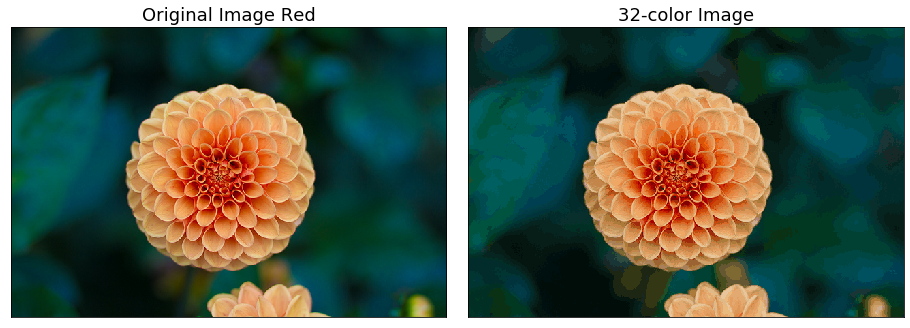

In [39]:
fig, axes = plt.subplots(1,2, sharey=False, squeeze=True, figsize=(16, 6),
                         subplot_kw={'xticks' : [],'yticks' : []}, gridspec_kw={'wspace': 0.05})
axes[0].imshow(flower)
axes[0].set_title('Original Image Red',size=18)
    
axes[1].imshow(flower_recolored)
axes[1].set_title('32-color Image',size=18)